<a href="https://colab.research.google.com/github/Felipe-dscarvalho/Felipe-dscarvalho/blob/main/Customer_segmentation_Kmeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


# Importanto Kmeans e métrica silhouette
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Importando Scaler
from sklearn.preprocessing import StandardScaler

# Dendograma e hierarquias
from scipy.cluster.hierarchy import dendrogram, linkage


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_segmentation/db_customer_segmentation.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Há 24 valores nulos na variável "Income", vamos preencher com a mediana pois trata-se de uma variável de salário.



In [12]:
df = df.dropna()

In [13]:
df['Income'].fillna(df['Income'].median(), inplace = True)


In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Vamos calcular a idade de cada cliente a partir da coluna de aniversário e ano de nascimento.

In [ ]:
df['Age'] = 2015 - df['Year_Birth']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,34


### Criando tempo da última compra


In [22]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
datas = []
for i in df["Dt_Customer"]:
    i = i.date()
    datas.append(i)

print("Data de inscrição do cliente mais recente nos registros:",max(datas))
print("Data de inscrição do cliente mais antigo nos registros:",min(datas))

Data de inscrição do cliente mais recente nos registros: 2014-06-29
Data de inscrição do cliente mais antigo nos registros: 2012-07-30


In [23]:
#Criando coluna da data da inscrição do cliente.
dias = []
d1 = max(datas)
for i in datas:
  delta = d1-i
  dias.append(delta)
df["Customer_desde"] = dias
df["Customer_desde"] = pd.to_numeric(df["Customer_desde"], errors = "coerce")



### Relação entre status conjugal e educacional


In [28]:
print("Total de categorias na classe Marital_status:\n", df["Marital_Status"].value_counts(),"\n")
print("Total de categorias na classe educacional_status:\n", df["Education"].value_counts())

Total de categorias na classe Marital_status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total de categorias na classe educacional_status:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Definindo gasto anual dos clientes

In [ ]:
df['Gasto_anual'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df = df.rename(columns = {"Income":"Rendimento_anual", "Recency":"Frequencia_compra"})

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Rendimento_anual,Kidhome,Teenhome,Dt_Customer,Frequencia_compra,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Gasto_anual
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,58,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,61,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,50,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,31,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,34,422


In [ ]:
df = df[['Rendimento_anual','Gasto_anual', 'Age','Frequencia_compra']]

In [ ]:
df.head()

,Rendimento_anual,Gasto_anual,Age,Frequencia_compra
0,58138.0,1617,58,58
1,46344.0,27,61,38
2,71613.0,776,50,26
3,26646.0,53,31,26
4,58293.0,422,34,94


In [ ]:
df.describe()

,Rendimento_anual,Gasto_anual,Age,Frequencia_compra
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,605.798214,46.194196,49.109375
std,25037.955891,602.249288,11.984069,28.962453
min,1730.000000,5.000000,19.000000,0.000000
25%,35538.750000,68.750000,38.000000,24.000000
50%,51381.500000,396.000000,45.000000,49.000000
75%,68289.750000,1045.500000,56.000000,74.000000
max,666666.000000,2525.000000,122.000000,99.000000


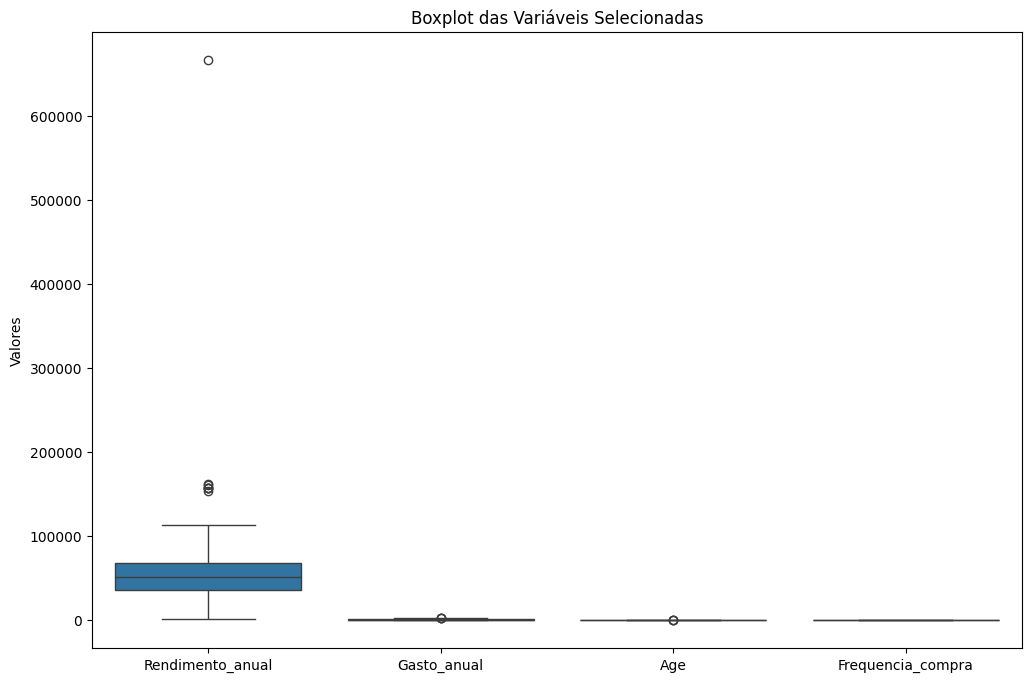

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Rendimento_anual', 'Gasto_anual', 'Age', 'Frequencia_compra']])
plt.title('Boxplot das Variáveis Selecionadas')
plt.ylabel('Valores')
plt.show()

Pode-se observar que na coluna de rendimento anual temos valores fora da curva, conhecidos como _Outliers_.

In [ ]:
#Removendo Outliers com estatística
Q1 = df['Rendimento_anual'].quantile(0.05)
Q3 = df['Rendimento_anual'].quantile(0.95)
IQR = Q3 - Q1
df_after = df[(df['Rendimento_anual'] >= Q1 - 1.5 * IQR) & (df['Rendimento_anual'] <= Q3 + 1.5 * IQR)]

print(f"Antes do outlier{df.shape}\nDepois do outlier{df_after.shape}")


Antes do outlier(2240, 4)
Depois do outlier(2239, 4)


In [ ]:
df = df_after

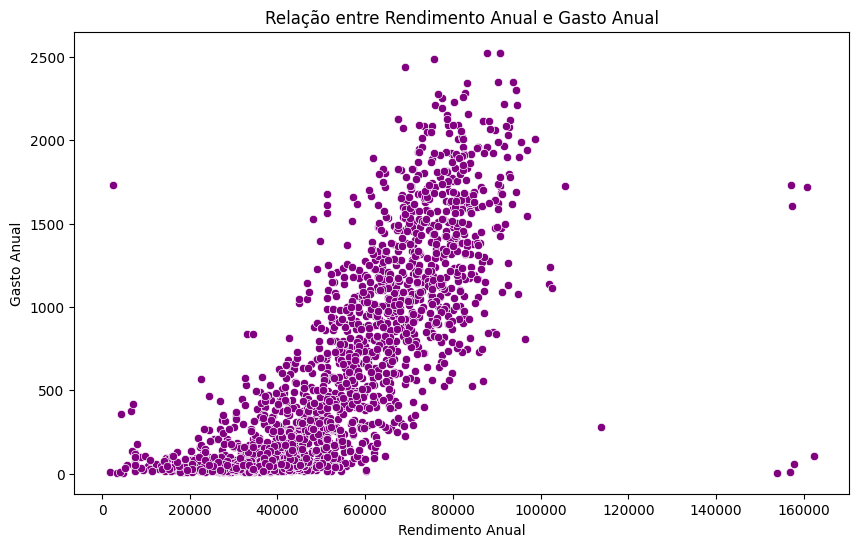

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rendimento_anual', y='Gasto_anual', c= 'purple', data=df)
plt.title('Relação entre Rendimento Anual e Gasto Anual')
plt.xlabel('Rendimento Anual')
plt.ylabel('Gasto Anual')
plt.show()


In [ ]:
print(f"\nCorrelação entre Idade_em_2014 and Gasto: {df['Gasto_anual'].corr(df['Rendimento_anual'])}")


Correlação entre Idade_em_2014 and Gasto: 0.789295785316152


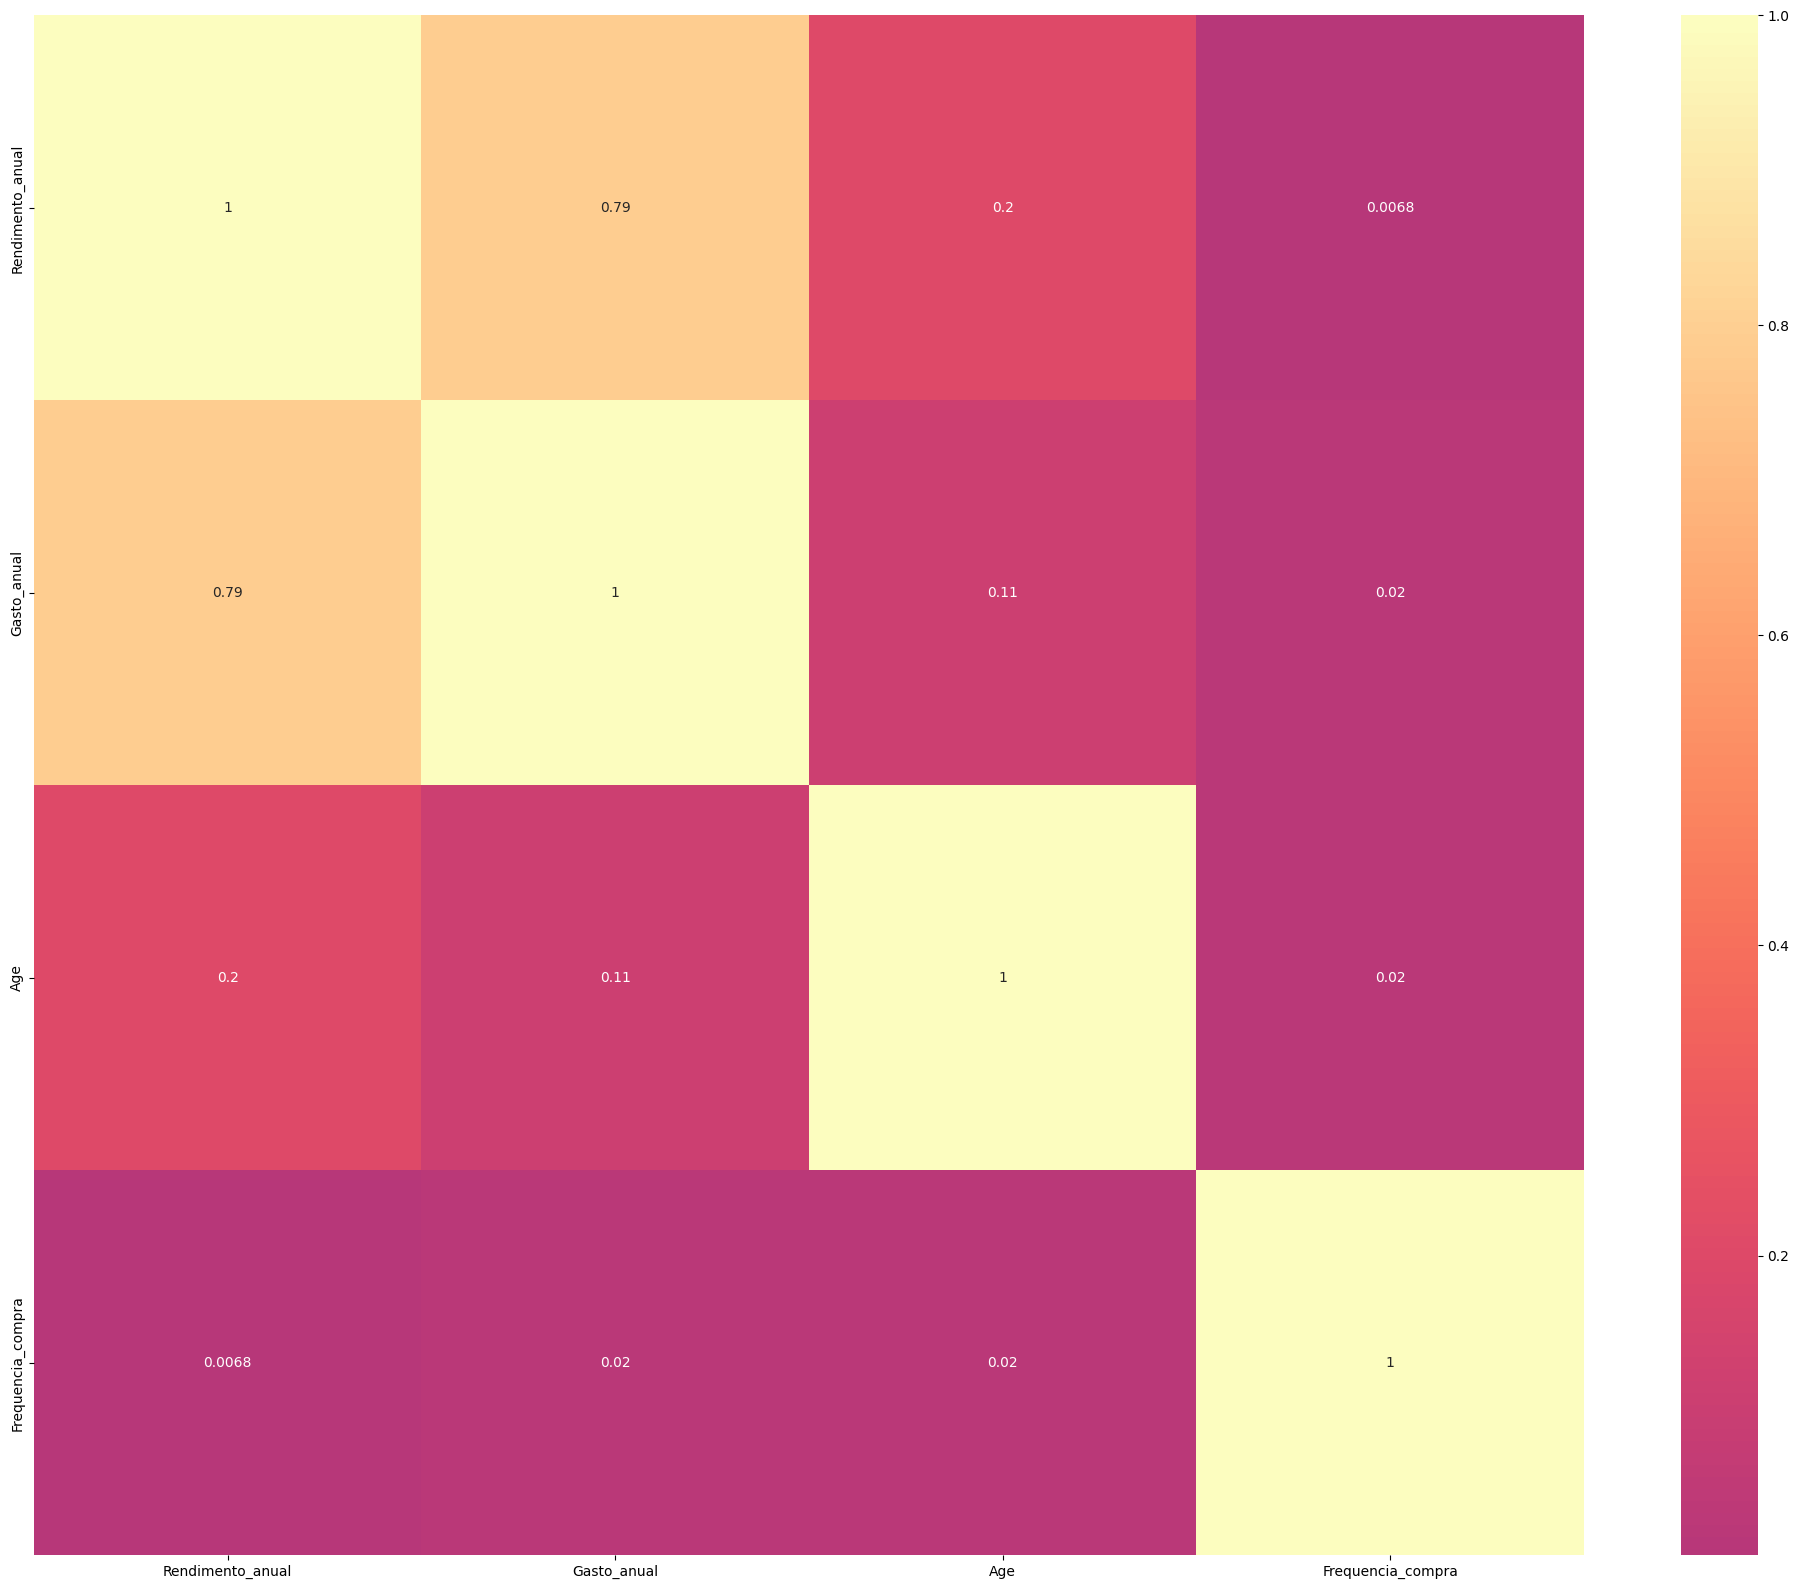

In [ ]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'magma', center = 0)
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)


In [ ]:
#df_scaled.columns = df.columns
df_scaled.columns = ['Rendimento_anual', 'Gasto_anual', 'Age', 'Frequencia_compra']

In [ ]:
df_scaled.head()

,Rendimento_anual,Gasto_anual,Age,Frequencia_compra
0,0.288446,1.678944,0.984922,0.306624
1,-0.262524,-0.961639,1.235281,-0.384051
2,0.917946,0.282258,0.317300,-0.798456
3,-1.182738,-0.918460,-1.268304,-0.798456
4,0.295687,-0.305645,-1.017946,1.549838


In [ ]:
features = ['Rendimento_anual', 'Gasto_anual', 'Age', 'Frequencia_compra']

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.fit_predict(X_scaled)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_names = ['Bronze', 'Silver', 'Gold']


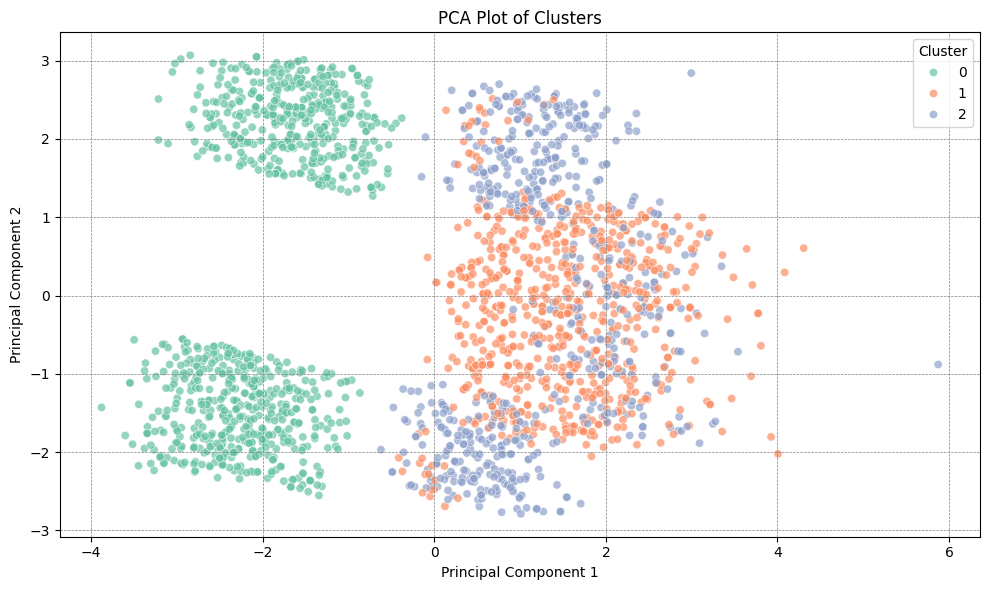

In [ ]:
from sklearn.decomposition import PCA

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title = 'Cluster')


plt.show()